<h1> Индивидуальное соревнование по курсу "Математические пакеты" </h1>

<p> Работу выполнил: Соседков Кирилл, группа 9383 </p>

<h2> Цель работы </h2>

<p> 1) Индивидуальное творческое соревнование. </p>
<p> 2) Самостоятельное освоение одного из важных методов обучения без учителя — обучение без учителя.</p>
<p> 3) Практическое применение дискретного преобразования Фурье для извлечения признаков обучения.</p>
<p> 4) Использованием библиотек Python для кластеризации музыкальных сигналов. </p>

<h2> Выполнение работы </h2>

<h3> Загрузка mp3 файлов </h3>

<p> Для загрузки mp3 файлов используется билиотека pydub </p>

In [1]:
from pydub import AudioSegment

def read_audio_signal(path):
    sound = AudioSegment.from_mp3(path)
    sound_info = dict()
    sound_info['path'] = path
    sound_info['data'] = sound
    return sound_info

<h3> Извлечение сигналов </h3>

При загрузке сигнала берется полусумма каналов

In [2]:
import numpy as np

def extract_samples(sound):
    samples = np.array(sound['data'].get_array_of_samples())
    return (samples[0::2] + samples[1::2])/2

<h2> Извлечение признаков </h2>

<p>Для извлечения признаков используется дискретное преобразование Фурье</p>
<p>Кадр является подходящим, если:
    $ avg_i \ge \frac{avg}{3}$, где $ avg_i $ - среднее значение кадра, $ avg $ - среднее значение сигнала

In [3]:
import numpy as np

n = 128

def extract_features(signal):
    # 1 Сигнал разбивается на временные интервалы (кадры) одинаковой длины N отсчетов sm(i), где m— номер кадра.
    signal_parts = np.array_split(signal, n)
    
    # 2 Для каждого подходящего кадра проводится предварительное оконное преобразование, 
    # чтобы уменьшить искажения при последующем вычислении ДПФ (модель сигнала): sˆm(i) = sm(i)w(i).
    avg = np.average(np.abs(signal_parts))
    for i in range(len(signal_parts)):
        avg_i = np.average(np.abs(signal_parts[i]))
        if(avg_i < avg/3): 
            signal_parts[i] = np.zeros(len(signal_parts[i]))
        else:
            signal_parts[i] = np.hamming(len(signal_parts[i]))*signal_parts[i]
    
    # 3 Далее для каждого подходящего кадра sˆm вычисляется амплитудный спектр Sm(k).
    spectrum = []
    for part in signal_parts:
        spectrum.append(abs(np.fft.rfft(part, n = n)))

    # 4 Формируем вектор среднего спектра по всем подходящим кадрам.
    average = []
    for spec in spectrum:
        average.append(np.average(spec))
        
    return average

<h2> Создание списка признаков для каждого сигнала </h2>

In [166]:
import os

features = []
for filename in sorted(os.listdir('./mp3_2/')) :
    if filename.endswith(".mp3"): 
        sound = (read_audio_signal(os.path.join('./mp3_2/', filename)))
        signal = extract_samples(sound)
        features.append(extract_features(signal))

<h2> Кластеризация методом k-средних </h2>

Параметры алгоритма подбирались так, чтобы значение компактности кластеров было минимальным

In [422]:
from sklearn.cluster import KMeans

X = np.array(features)
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=624, max_iter=478).fit(X)

<h2> Визуализация </h2>


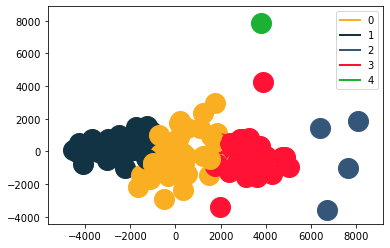

In [433]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.lines import Line2D


# снижение размерности данных методом главных компонент(PCA)
reduced_data = PCA(n_components=2).fit_transform(features)


colors = ['#faaf23', '#123344', '#345678', '#ff1234', '#1bb133']

for item, label in zip(reduced_data, kmeans.labels_):
    plt.scatter(item[0], item[1], s=400, color=colors[label])
    
custom_lines = [Line2D([0], [0], color=colors[0], lw=2),
                Line2D([0], [0], color=colors[1], lw=2),
                Line2D([0], [0], color=colors[2], lw=2),
                Line2D([0], [0], color=colors[3], lw=2),
                Line2D([0], [0], color=colors[4], lw=2),]

plt.legend(custom_lines, ['0', '1', '2', '3', '4'])

 <h2> Вычисление компактности кластеров </h2>

In [436]:
def cluster_cohesion(features, kmeans, centers):
    clusters = 5
    cc = 0
    for label in range(clusters):
        current_cluster = list(filter(lambda x: x[1] == label, list(zip(features, kmeans.labels_))))
        for cluster in current_cluster:
            cc += np.linalg.norm(cluster[0] - centers[label])**2
    return (cc/clusters)

print(cluster_cohesion(features, kmeans, kmeans.cluster_centers_))

557275932.0258989


<h2> Запись полученных результатов в файл </h2>
<p> Название файла: result.csv </p>

In [437]:
# csv
csv_data = []
with open('result.csv', 'w') as f:
    for filename, label in zip(sorted(os.listdir('./mp3_2/')), kmeans.labels_) :
        if filename.endswith(".mp3"): 
            f.write(os.path.basename(filename + ', '  + str(label) + '\n'))

<h2> Вывод </h2>

<p>При выполнении работы был освоен один из важных методов машинного обучения - обучение без учителя, на примере кластеризации музыкальных сигналов. 
Так же были получены практические навыки применения дискретного преобразования Фурье для извлечения признаков обучения.
</p>
